#Contexto

Para que las empresas sean competitivas y disparen su crecimiento, necesitan aprovechar la IA/ML para desarrollar modelos predictivos para pronosticar las ventas a futuro, para esto nos basaremos en datos historicos, al tiempo al tiempo que se tiene encuenta los efectos de estacionalidad, la demanda, las vacaciones, las promociones y la competencia.

Se analizaran datos de 1115 tiendas, el objetivo, predecir las ventas diarias futuras en fiunción de las caracteristicas.

IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
# Se importan librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import io
import requests
from zipfile import ZipFile

IMPORTAR EL DATASET DE VENTAS

In [11]:
# Fuente original de los datos: https://www.kaggle.com/c/rossmann-store-sales/data
# Se importa el dataset que esta comprimido y se descomprime

url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4594/860645/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1694017233&Signature=SpV7oIhcxrx1RLnBYMIsYjGuaRoamWR1mMlv0rZdQO6CUjvbPKcetA8vdWeA37F3sUuDveSjMlDQL71B9Fg20V1OZ71RiBk6Xjmz6jkBwUKfcevPZYbLBX1z4PYUvSO6R6ts5slguq2hzhzkaq5bEnGjSxmUWQkjVafZfeuupK2OVQkv3Gjjl7PujQDAZpZRgSaVphIcdb%2FF4hAKIQgl4aqdExMM%2F8b3eKbkWmk%2F9dQYstDSpxsaxsKQ5F9VUHzes4hwChZQXUOcNMfLK68rEfaCXZkiGparUXFqEFXvhxp1nJa%2FhaIwy3BIhIJw7G3c3hL%2Bjab%2F%2FdoMKOPDXDvNCA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip'
r = requests.get(url)
z = ZipFile(io.BytesIO(r.content))
z.extractall()

csv_file = 'train.csv' # Nombre del archivo
sales_train_df = pd.read_csv(csv_file, low_memory=False) # se crea el dataframe


In [6]:
sales_train_df.head(5)  # Observamos los primeros 5 registros
# Casi un millón de observaciones
# 1115 tiendas únicas
# Notemos que las ventas es la variable objetivo (la que intentamos predecir)

# Id:  ID de transacción (combinación de la tienda y la fecha)
# Store: identificador único de la tienda
# Sales: ventas diarias, esta es la variable objetivo
# Customers: número de clientes de un día dado
# Open: Booleano para indicar si la tienda estaba abierta o cerrada (0 = cerrada, 1 = abierta)
# Promo: describe si la tienda tenía algún tipo de promoción ese día o no
# StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
# SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.tail(10) # Observamos los últimos 10 registros

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
sales_train_df.info() # Obsevamos la información del data frame

# 9 columnas en total
# 8 características, cada una con 1017209 puntos de datos
# 1 variable objetivo (ventas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format) # agregamos esta opción para mostrar decimales y no como exponentes
sales_train_df.describe() # Solicitamos un resumen estadístico

# Cantidad de ventas promedio por día = 5773 Euros, ventas mínimas por día = 0, ventas máximas por día = 41551
# Número medio de clientes = 633, número mínimo de clientes = 0, número máximo de clientes = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


IMPORTAR LA INFORMACIÓN SOBRE LAS TIENDAS



In [9]:
url2 = 'https://storage.googleapis.com/kagglesdsdata/competitions/4594/860645/store.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1694018282&Signature=0hnHU63dmlVDPsU4qPneQJu5pIOheVf3%2Bfr3MUi7wL8SWPUTeAmMZT89M4WI%2FW6EU06wsZG34KBi20pE85zZHO%2F0HqNekJY0oRl3xunPRbUyJPYUBy1IWfL6UADwvqAH41GOAGqo3kODYi56ddAY37KVEMxiyK%2BvK%2BJa6%2BKGCpZKnF7ES0S%2FyAp6r4YF4NzNk2%2Ff2ZvItzD0TwBTCSykpBXDc58WpBKDBDyHtG9DI%2BUOYoLuDQY6p98QRDP5CwFmZyRbhJgS5CKv4azyBfdeP4ZdGb4vrw15dAue7itG4%2FoOkFH3B8FDM7r4tlUDnkoz0%2BHVbUPmf6w3jVudgXHgyw%3D%3D&response-content-disposition=attachment%3B+filename%3Dstore.csv'

store_info_df = pd.read_csv(url2)

# StoreType: categoría que indica el tipo de tienda (a, b, c, d)
# Assortment:  a = básico, b = extra, c = extedido
# CompetitionDistance (en metros): distancia a la tienda de la competencia más cercana
# CompetitionOpenSince [Mes/Año]:  fecha en que abrió la competencia
# Promo2: Promo2 es una promoción continuada y consecutiva en algunas tiendas (0 = la tienda no participa, 1 = la tienda participa)
# Promo2Since [Año/Semana]: fecha en la que la tienda empieza a participar en la Promo2
# PromoInterval: describe los intervalos consecutivos donde la Promo2 empieza, indicando los meses en los que empieza la misma. P.e. "Feb,May,Aug,Nov" significa que cada nueva ronda de promoción empieza en Febrero, Mayo, Agosto, Noviembre de cualquier año de esa tienda


In [10]:
store_info_df # Imprimimos el data frame

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Hagamos lo mismo con los datos store_info_df
# Hay que tener en cuenta que el data frame anterior incluye las transacciones registradas por día (en millones)
# Este data frame solo incluye información sobre las 1115 tiendas exclusivas que forman parte de este estudio

store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe() #Solicitamos un resumen estadístico

# De media, la distancia de la competencia es de 5404 metros (5,4 kms)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


# EXPLORAR EL DATASET

EXPLORAR EL DATASET DE VENTAS

In [ ]:
# Verificamos si hay datos faltantes en el data frame de ventas
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

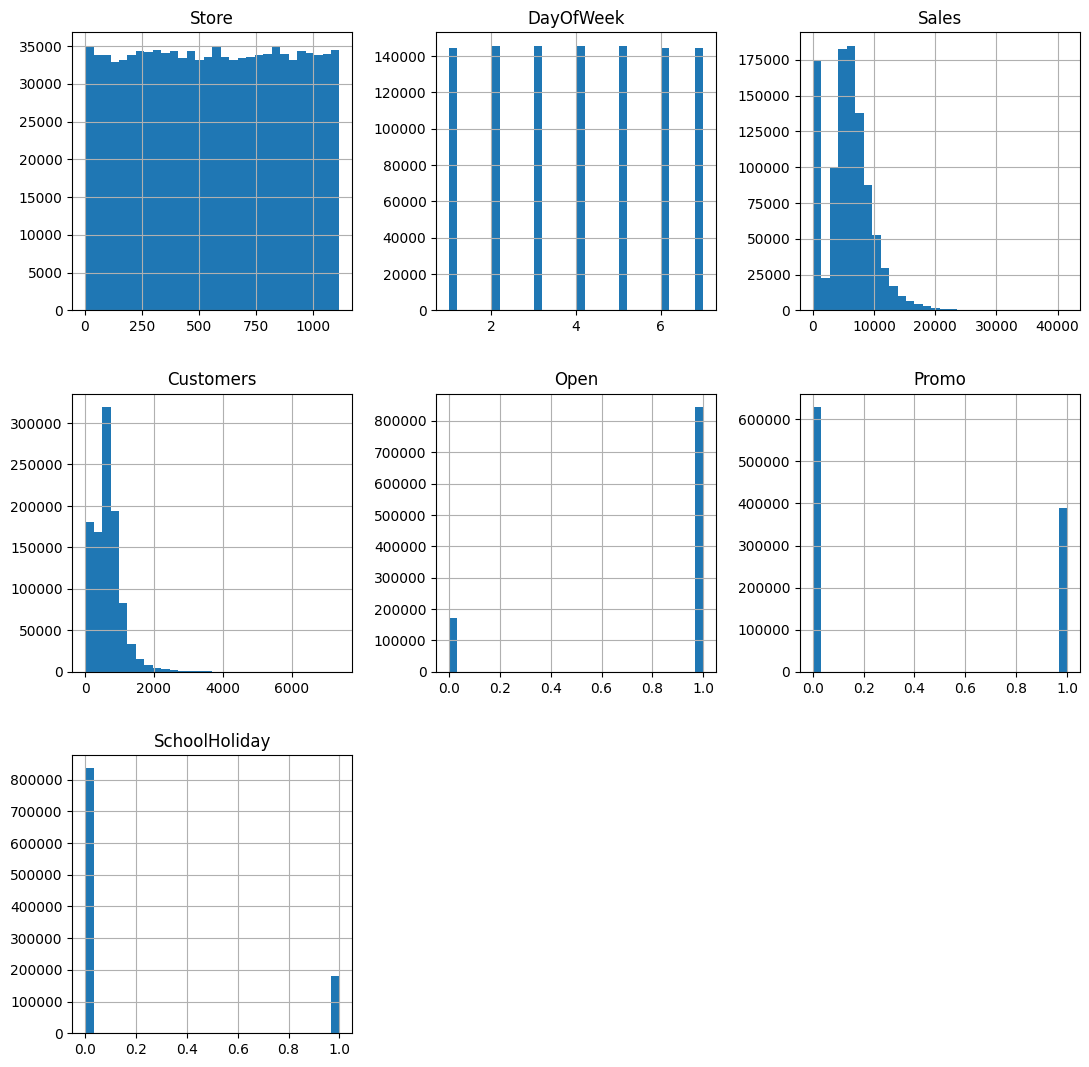

In [ ]:
# Promedio de 600 clientes por día, el máximo es 4500 (¡tenga en cuenta que no podemos ver el valor atípico en 7388!)
# Los datos se distribuyen por igual en varios días de la semana (~ 150000 observaciones x 7 días = ~ 1,1 millones de observaciones)
# Las tiendas están abiertas ~ 80% del tiempo
# Los datos se distribuyen por igual entre todas las tiendas (sin sesgo)
# La promoción # 1 se ejecutó aproximadamente el 40% del tiempo
# Ventas promedio alrededor de 5000-6000 Euros
# Las vacaciones escolares duran alrededor del 18% del tiempo

sales_train_df.hist(bins=30, figsize=(13, 13))  # Graficamos en histogramas para ver la distribución

In [ ]:
# Verificamos la cantidad maxima de clientes

sales_train_df['Customers'].max()

7388

In [ ]:
sales_train_df[sales_train_df['Customers'] == sales_train_df['Customers'].max()] # Observamos el registro completo

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [ ]:
sales_train_df['Sales'].max() # Observamos el maximo de ventas

41551

In [ ]:
sales_train_df[sales_train_df['Sales'] == sales_train_df['Sales'].max()] #Observamos el registro completo

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
44393,909,1,2015-06-22,41551,1721,1,0,0,0


In [ ]:
# ¡Veamos cuántas tiendas estubieron abiertas y cerradas!
close_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
# Contemos el número de tiendas que están abiertas y cerradas
print('Total de transacciones: {:,}'.format(len(sales_train_df)))
print('Tiendas cerradas: {:,}'.format(len(close_train_df)))
print('Tiendas abiertas: {:,}'.format(len(open_train_df)))
print('Porcentaje de Tiendas Cerradas: {:.2f}%'.format(len(close_train_df)/len(sales_train_df)*100))

Total de transacciones: 1,017,209
Tiendas cerradas: 172,817
Tiendas abiertas: 844,392
Porcentaje de Tiendas Cerradas: 16.99%


In [ ]:
# nos quedamos solo con las tiendas abiertas y eliminamos las tiendas cerradas

sales_train_df = sales_train_df[sales_train_df['Open'] == 1]


In [ ]:
# Eliminemos la columna open ya que ahora no tiene sentido
sales_train_df.drop(['Open'], axis = 1, inplace = True)

<ipython-input-21-12c46b353f25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis = 1, inplace = True)


In [ ]:
sales_train_df.head(5)  # Observamos los primeros 5 registros


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [ ]:
sales_train_df.describe() # Solicitamos un resumen estadístico

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,0.45,0.19
std,321.73,1.72,3104.21,401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00


In [ ]:
# Observamos que los datos estadisticos cambian bastante sin las tiendas cerradas
# Ventas promedio = 6955 Euros, número promedio de clientes = 762 (ha subido)

EXPLORAMOS LOS DATOS DE LA INFORMACIÓN DE LAS TIENDAS

In [ ]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# ¡Veamos si falta algún dato en el data frame de información de la tienda!
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Echemos un vistazo a los valores faltantes en la 'CompetitionDistance'
# Solo faltan 3 filas

store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.00,2013.00,"Feb,May,Aug,Nov"


In [ ]:
# Echemos un vistazo a los valores faltantes en el 'CompetitionOpenSinceMonth'
# Faltan muchas filas = 354 (casi un tercio de las 1115 tiendas)

store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00,NaN,NaN,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00,NaN,NaN,1,45.00,2009.00,"Feb,May,Aug,Nov"
15,16,a,c,3270.00,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.00,NaN,NaN,1,22.00,2011.00,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00,NaN,NaN,1,22.00,2012.00,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00,NaN,NaN,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00,NaN,NaN,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.00,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Verificamos si la variable Promo2 es cero, como van las otras variables de promo

store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN
5,6,a,a,310.00,12.00,2013.00,0,NaN,NaN,NaN
6,7,a,c,24000.00,4.00,2013.00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00,4.00,2004.00,0,NaN,NaN,NaN
1109,1110,c,c,900.00,9.00,2010.00,0,NaN,NaN,NaN
1111,1112,c,c,1880.00,4.00,2006.00,0,NaN,NaN,NaN
1112,1113,a,c,9260.00,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Parece que si 'promo2' es cero, 'promo2SinceWeek', 'Promo2SinceYear' y la información de 'PromoInterval' es campo nulo
# Hay 354 filas donde 'CompetitionOpenSinceYear' y 'CompetitionOpenSinceMonth' falta
# Establezcamos estos valores en ceros
nul2cero = ['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_info_df[nul2cero] = store_info_df[nul2cero].fillna(0) # llenamos los campos nulos con ceros
store_info_df.isnull().sum()  # comprobamos

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_info_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,0.00,0.00,0
4,5,a,a,29910.00,4.00,2015.00,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.00,6.00,2014.00,1,31.00,2013.00,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.00,4.00,2006.00,0,0.00,0.00,0
1112,1113,a,c,9260.00,0.00,0.00,0,0.00,0.00,0
1113,1114,a,c,870.00,0.00,0.00,0,0.00,0.00,0


In [ ]:
# Hay 3 filas con valores de 'CompetitionDistance' que faltan, llenémoslas con valores promedio de la columna 'CompetitionDistance'

store_info_df['CompetitionDistance'] = store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean())

In [ ]:
store_info_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

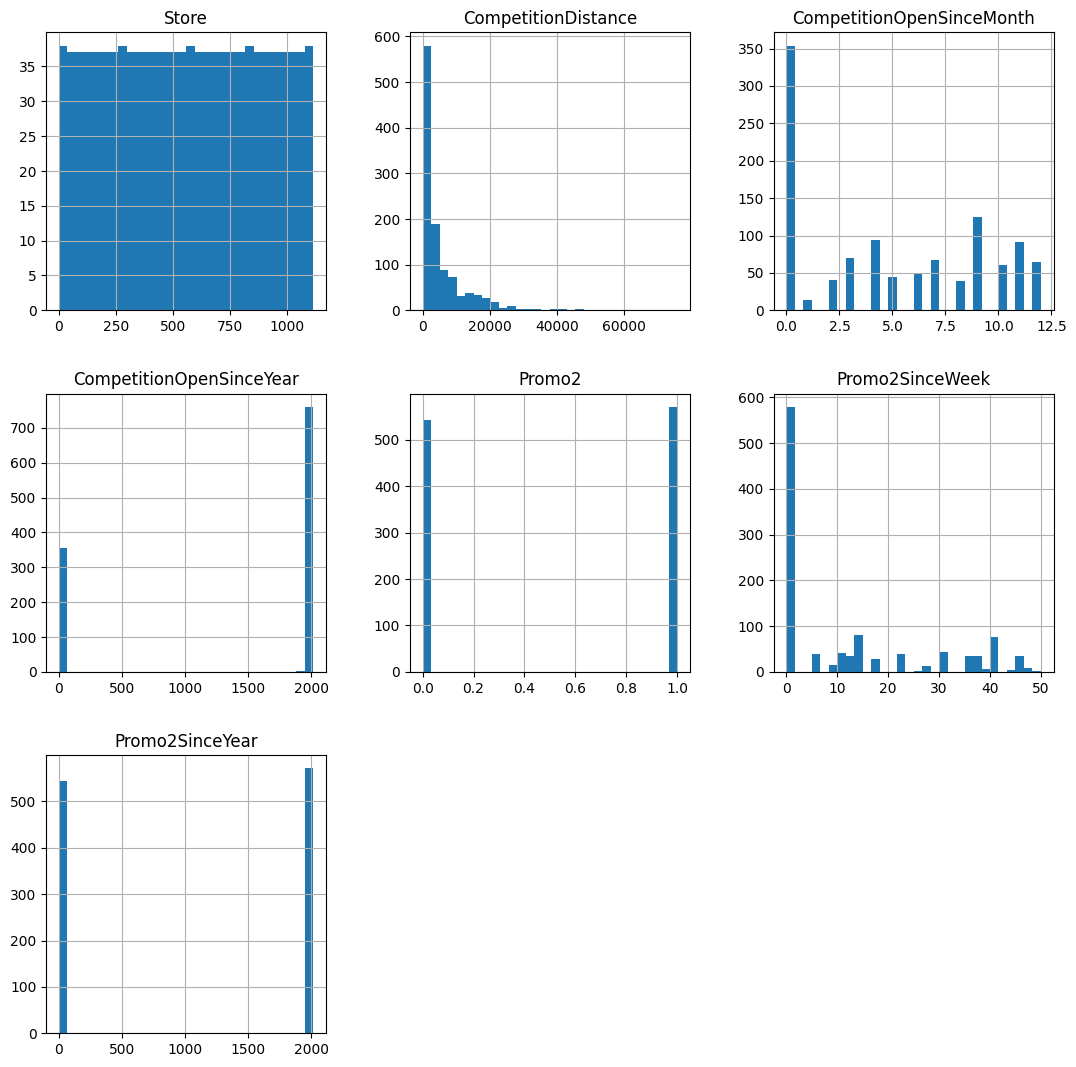

In [ ]:
# la mitad de las tiendas participan en la promoción 2
# la mitad de las tiendas tienen su competencia a una distancia de 0-3000 m (3 kms de distancia)

store_info_df.hist(bins=30, figsize=(13, 13))

#EXPLOREMOS EL DATASET COMBINADO

In [12]:
# Combinemos ambos dataframes en función de 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store') # juntamos los data frames

In [ ]:
# Guardamos el nuevo df en un nuevo archivo csv para trabajar con él con otros medios

sales_train_all_df.to_csv('sales_train_all.csv', index = False)

In [ ]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.00,6.00,2009.00,0,0.00,0.00,0


In [ ]:
store_info_df # se observa que el nuevo df une las columnas de los otros dos

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,0.00,0.00,0
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,0.00,0.00,0
4,5,a,a,29910.00,4.00,2015.00,0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.00,6.00,2014.00,1,31.00,2013.00,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.00,4.00,2006.00,0,0.00,0.00,0
1112,1113,a,c,9260.00,0.00,0.00,0,0.00,0.00,0
1113,1114,a,c,870.00,0.00,0.00,0,0.00,0.00,0


In [ ]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()   # ordenamos los valores de mayor a menor y vemos las correlaciones
correlations
# los clientes y la promoción se correlacionan positivamente con las ventas
# Promo2 no parece ser efectivo en absoluto

<ipython-input-39-6a3ebb8ff9d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.18
Promo2SinceYear             -0.13
Promo2                      -0.13
Promo2SinceWeek             -0.06
CompetitionDistance         -0.04
CompetitionOpenSinceMonth   -0.02
CompetitionOpenSinceYear     0.01
Store                        0.01
SchoolHoliday                0.04
Promo                        0.37
Customers                    0.82
Sales                        1.00
Name: Sales, dtype: float64

<Axes: >

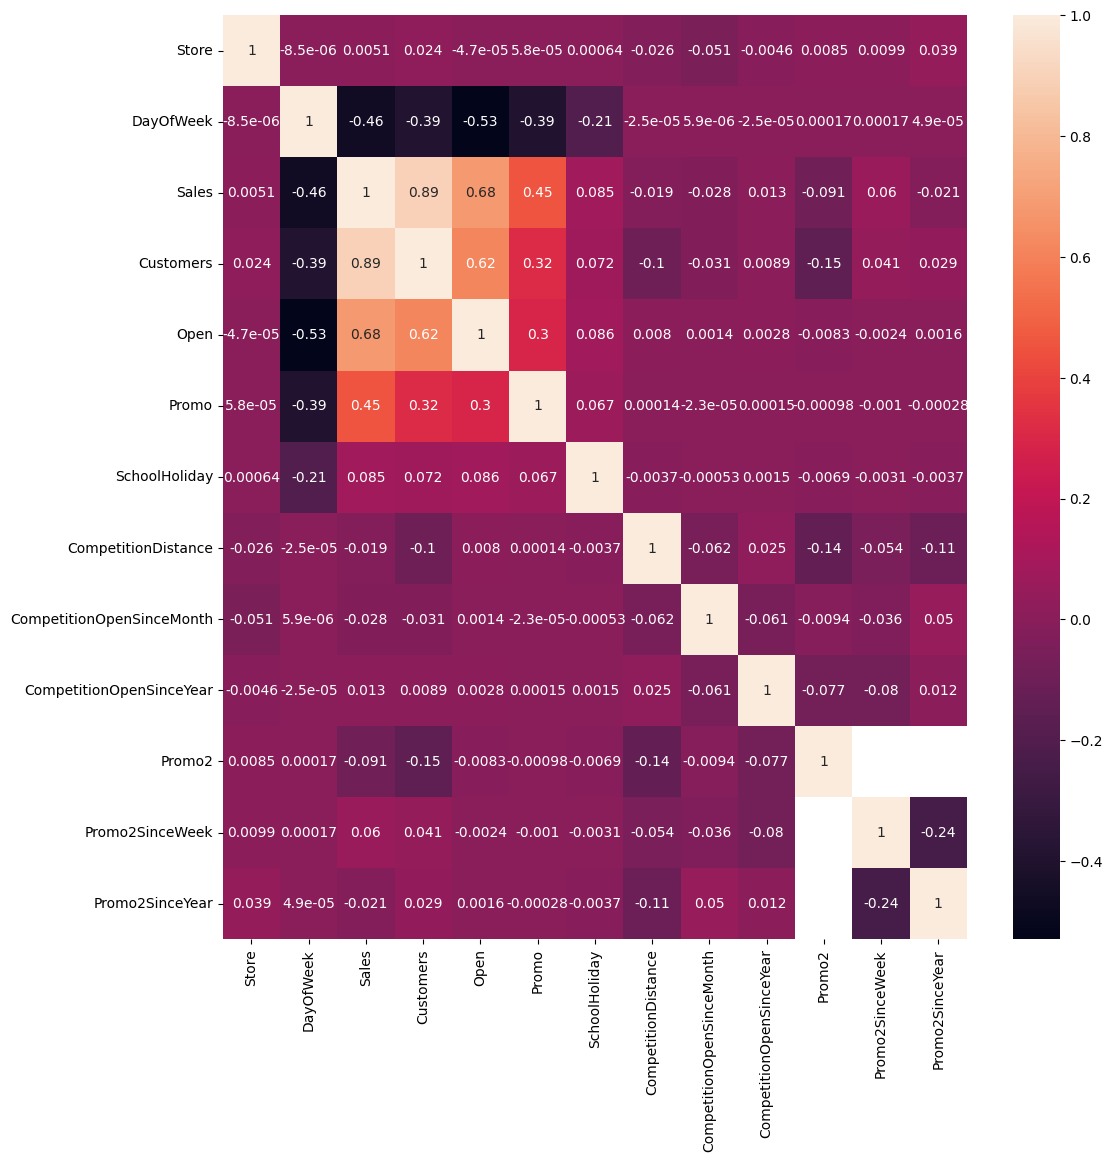

In [13]:
# Graficamos en un mapa de calor la correlación de las variables
correlations = sales_train_all_df.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, annot=True)

# Los clientes / Promo2 y las ventas están fuertemente correlacionados

In [14]:
# Separemos el año y pongámoslo en una columna separada

sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015


In [15]:
# Hacemos lo mismo para el día y el mes

sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27


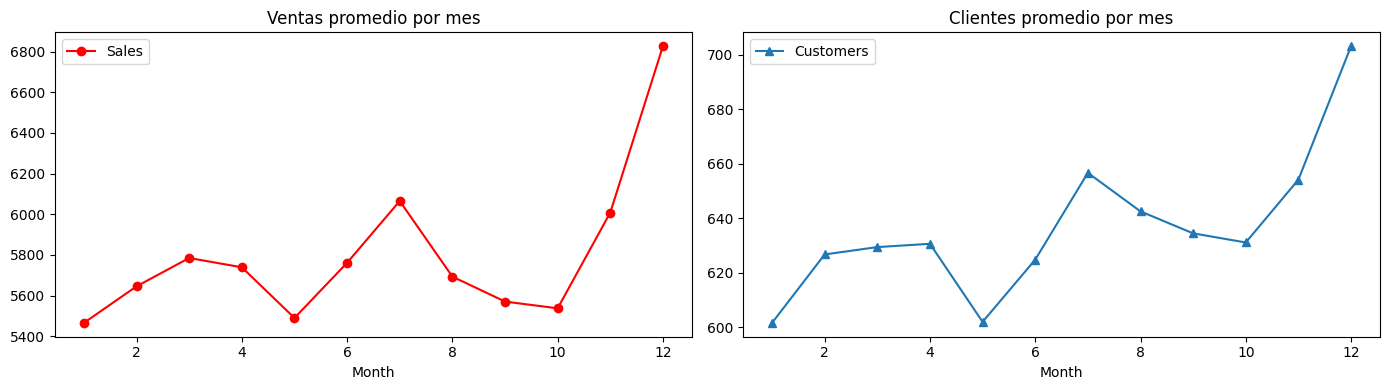

In [16]:
# Echemas un vistazo a las ventas promedio y la cantidad de clientes por mes.
# 'groupby' funciona muy bien al agrupar todos los datos que comparten la misma columna del mes, luego obtener la media de la columna de ventas
# Parece que las ventas y el número de clientes alcanzan su punto máximo en el período de Navidad

# Creamos una figura y una matriz de subgráficos de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico 1 - Ventas promedio por mes
sales_train_all_df.groupby('Month')[['Sales']].mean().plot(ax=axes[0], marker='o', color='r')
axes[0].set_title('Ventas promedio por mes')

# Gráfico 2 - Clientes promedio por mes
sales_train_all_df.groupby('Month')[['Customers']].mean().plot(ax=axes[1], marker='^')
axes[1].set_title('Clientes promedio por mes')

# Mostramos la figura con ambos gráficos
plt.tight_layout()
plt.show()

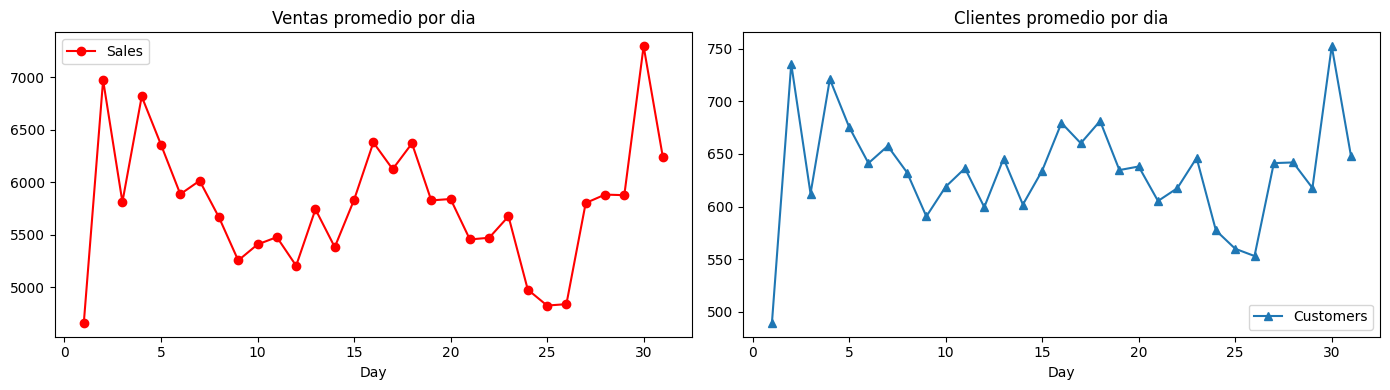

In [17]:
# Echemos un vistazo a las ventas y a los clientes por día del mes.
# El número mínimo de clientes suele rondar el día 24 del mes.
# La mayoría de los clientes y las ventas son alrededor del 30 y el 1 del mes

# Creamos una figura y una matriz de subgráficos de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico 1 - Ventas promedio por dia
sales_train_all_df.groupby('Day')[['Sales']].mean().plot(ax=axes[0], marker='o', color='r')
axes[0].set_title('Ventas promedio por dia')
plt.grid()

# Gráfico 2 - Clientes promedio por dia
sales_train_all_df.groupby('Day')[['Customers']].mean().plot(ax=axes[1], marker='^')
axes[1].set_title('Clientes promedio por dia')

# Mostramos la figura con ambos gráficos
plt.tight_layout()
plt.show()

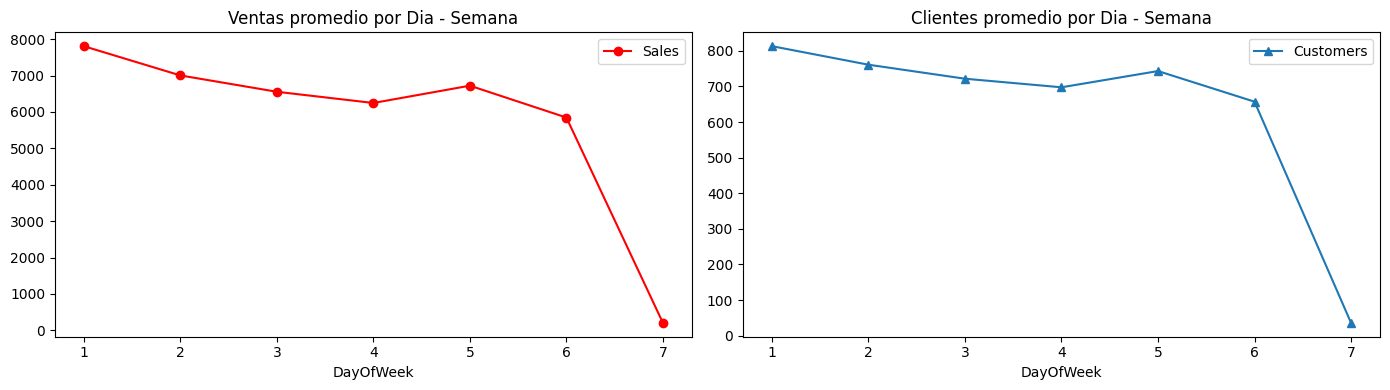

In [18]:
# Hagamos lo mismo para el día de la semana (notemos que 7 = domingo)
# Creamos una figura y una matriz de subgráficos de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico 1 - Ventas promedio por dia de la semana
sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(ax=axes[0], marker='o', color='r')
axes[0].set_title('Ventas promedio por Dia - Semana')
plt.grid()

# Gráfico 2 - Clientes promedio por dia de la semana
sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(ax=axes[1], marker='^')
axes[1].set_title('Clientes promedio por Dia - Semana')

# Mostramos la figura con ambos gráficos
plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

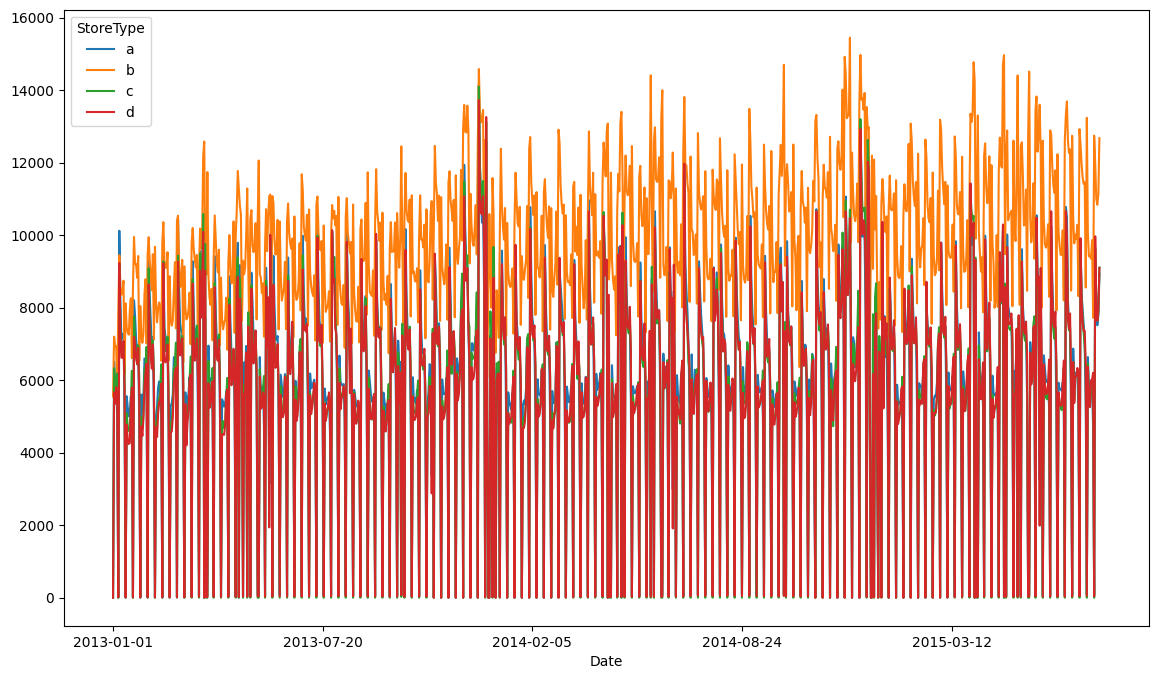

In [19]:
# Hacemos lo mismo para la semana

fig, ax = plt.subplots(figsize=(14, 8))
sales_train_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax = ax)

In [21]:
#Creamos una columna Week para poder visualizar mejor los datos anteriores
sales_train_all_df['Week'] = pd.DatetimeIndex(sales_train_all_df['Date']).week
sales_train_all_df.head()


<ipython-input-21-821d93f7ade7>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sales_train_all_df['Week'] = pd.DatetimeIndex(sales_train_all_df['Date']).week


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30,31
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29,31
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28,31
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27,31


<Axes: xlabel='Week'>

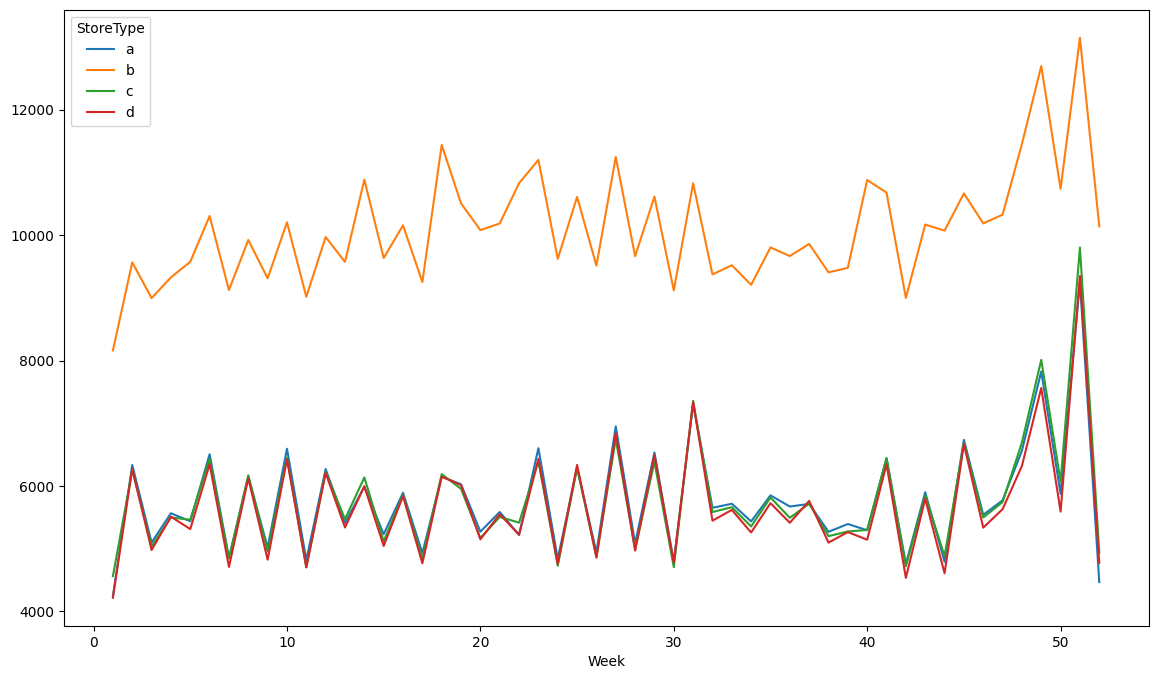

In [22]:
# Creamos la grafica de ventas promedio por semana, observamos que StoreType b es la que más ventas tiene
fig, ax = plt.subplots(figsize=(14, 8))
sales_train_all_df.groupby(['Week', 'StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax = ax)

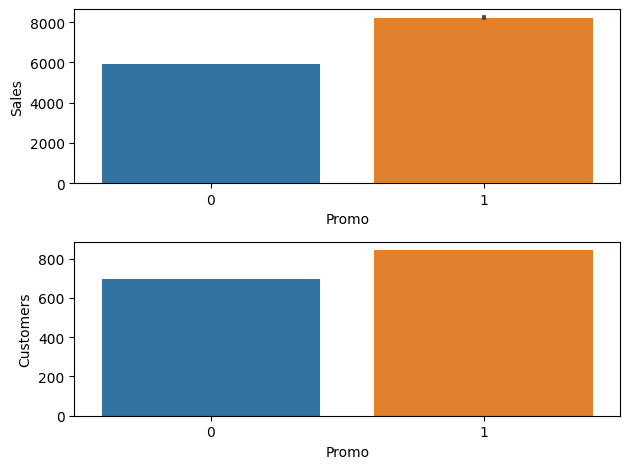

In [ ]:
#Realizamos una grafica de barras para ver las promociones contra ventas y clientes
plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data=sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data=sales_train_all_df)

plt.tight_layout()

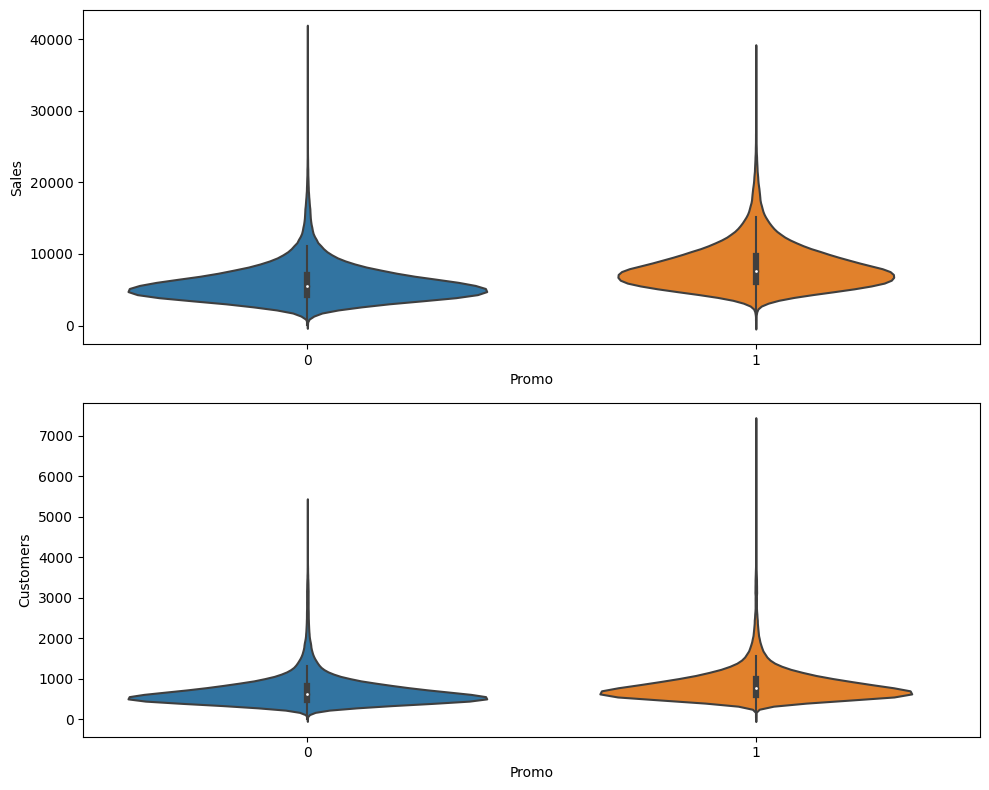

In [ ]:
#Utilizamos grafica de violin para ver las ventas promedio por promociones

plt.figure(figsize=(10, 8))

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data=sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data=sales_train_all_df)

plt.tight_layout()

En resumen, creamos una figura con dos subgráficos en forma de gráficos de violín para comparar la distribución de las ventas y el número de clientes según si hay o no promociones activas ("Promo") en el dataset sales_train_all_df. El primer subgráfico muestra la distribución de las ventas en función de la promoción, mientras que el segundo subgráfico muestra la distribución del número de clientes según si hay o no promociones.

In [ ]:
#En la primera grafica se observa que las ventas promedio son más altas en promociones 1 y 2

# ENTRENAR AL MODELO CON FACEBOOK PROPHET

Prophet es un procedimiento para predecir datos de series temporales basado en un modelo aditivo donde las tendencias no lineales se ajustan con estacionalidad anual, semanal y diaria, además de efectos de días festivos.

Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto a los datos faltantes y los cambios en la tendencia, y generalmente maneja bien los valores atípicos.

In [24]:
# importamos prophet
%%capture
# Utilizamos este comando para evitar que se muestre los mensajes

!pip install prophet
from prophet import Prophet


    Realiza predicciones de ventas para una tienda específica utilizando el modelo Prophet.

    Parámetros:
    - Store_ID: int o str, identificador de la tienda para la que se realizarán las predicciones.
    - sales_df: DataFrame, el DataFrame que contiene los datos históricos de ventas con columnas 'Date' y 'Sales'.
    - periods: int, el número de períodos futuros que se desean pronosticar.

    Retorna:
    - forecast: DataFrame, el DataFrame que contiene el pronóstico de ventas.
    - model: Prophet, el modelo Prophet ajustado.
    

In [25]:

def sales_predictions(Store_ID, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == Store_ID]   # Filtrar datos para la tienda específica
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds')  # Renombrar columnas y ordenar por fecha

  model = Prophet()
  model.fit(sales_df) # Ajustar el modelo Prophet
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)  # Generar DataFrame con fechas futuras y realizar el pronóstico
  figure = model.plot(forecast, xlabel = 'Fecha', ylabel = 'Ventas')  # Generar gráficos
  figure2 = model.plot_components(forecast)


La función sales_predictions toma como entrada el ID de una tienda, un DataFrame de ventas y un número de períodos y devuelve un pronóstico de ventas para esa tienda en particular. Primero, filtra los datos de ventas para la tienda específica y renombra y ordena las columnas. Luego, ajusta un modelo Prophet a los datos y genera un DataFrame con fechas futuras. Finalmente, realiza el pronóstico y genera gráficos para visualizar los resultados.

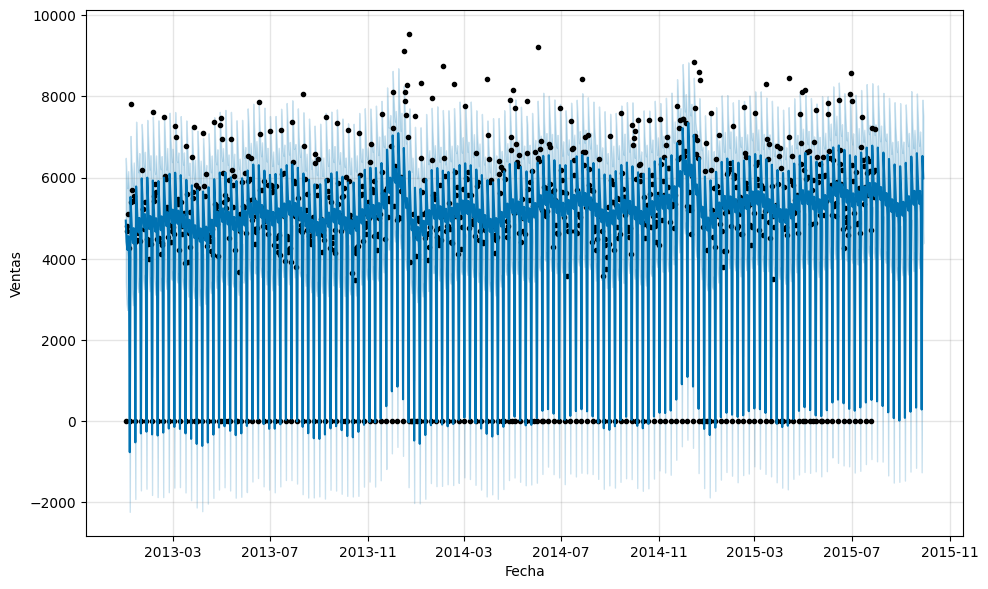

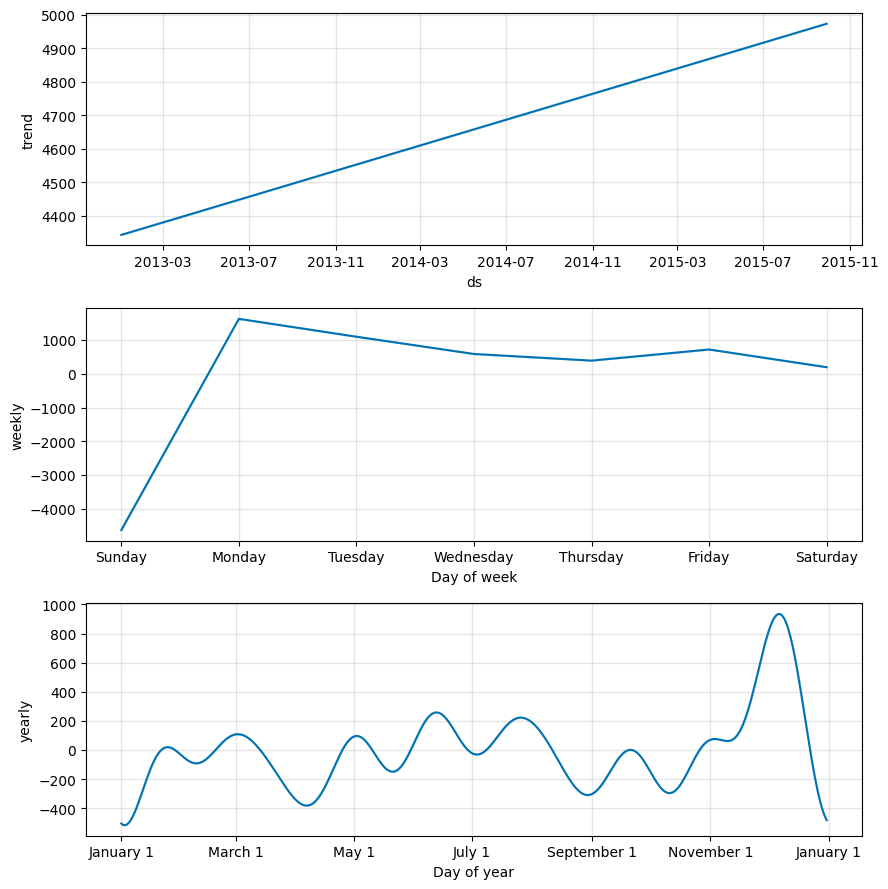

In [26]:
import logging
logging.getLogger('prophet').setLevel(logging.WARNING) # Deshabilitar mensajes de prophet
logging.getLogger('cmdstanpy').disabled = True # Deshabilitar mensajes de cmdstan

sales_predictions(10, sales_train_all_df, 60) #Ejecutamos la funcion para obtener los pronósticos con 60 días de la tienda 10


Hacemos pruebas para obtener el df

In [27]:
def sales_predictions1(Store_ID, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == Store_ID]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds') # Ordenamos por fecha

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)

  forecast = pd.DataFrame(forecast)
  forecast['yhat'] = forecast['yhat'].astype(int)
  forecast['yhat_lower'] = forecast['yhat_lower'].astype(int)
  forecast['yhat_upper'] = forecast['yhat_upper'].astype(int)
  return forecast



La función `sales_predictions1` toma como entrada el ID de una tienda, un DataFrame de ventas y un número de períodos y devuelve un pronóstico de ventas para esa tienda en particular. Primero, filtra los datos de ventas para la tienda específica y renombra y ordena las columnas. Luego, ajusta un modelo Prophet a los datos y genera un DataFrame con fechas futuras. Finalmente, realiza el pronóstico y convierte las columnas `yhat`, `yhat_lower` y `yhat_upper` a enteros antes de devolver el resultado.

In [29]:
forecast = sales_predictions1(10, sales_train_all_df, 60) #Ejecutamos la funcion y obtenemos los pronósticos para la tienda 10, creamos un DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4343.442516,3445,6434,4343.442516,4343.442516,597.211858,597.211858,597.211858,1101.051423,1101.051423,1101.051423,-503.839565,-503.839565,-503.839565,0.0,0.0,0.0,4940
1,2013-01-02,4344.069444,3011,5935,4344.069444,4344.069444,75.719841,75.719841,75.719841,589.087102,589.087102,589.087102,-513.367261,-513.367261,-513.367261,0.0,0.0,0.0,4419
2,2013-01-03,4344.696372,2755,5790,4344.696372,4344.696372,-122.611851,-122.611851,-122.611851,392.355562,392.355562,392.355562,-514.967413,-514.967413,-514.967413,0.0,0.0,0.0,4222
3,2013-01-04,4345.323300,2981,6137,4345.323300,4345.323300,212.917135,212.917135,212.917135,721.996372,721.996372,721.996372,-509.079237,-509.079237,-509.079237,0.0,0.0,0.0,4558
4,2013-01-05,4345.950228,2512,5536,4345.950228,4345.950228,-299.169406,-299.169406,-299.169406,197.097742,197.097742,197.097742,-496.267148,-496.267148,-496.267148,0.0,0.0,0.0,4046


ENTRENAR AL MODELO CON DIAS DE VACACIONES

- StateHoliday: indica si el día era festivo o no (a = vacaciones públicas, b = vacaciones de Pascua holiday, c = Navidades, 0 = No era festivo)
- SchoolHoliday: indica si (Store, Date) se ve afectado por el cierre de las escuelas públicas
  






In [30]:
#Generamos la misma funcion pero agregando los días festivos
def sales_predictions(Store_ID, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == Store_ID]   # Filtrar datos para la tienda específica
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values('ds')  # Renombrar columnas y ordenar por fecha

  model = Prophet(holidays=holidays)
  model.fit(sales_df) # Ajustar el modelo Prophet
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)  # Generar DataFrame con fechas futuras y realizar el pronóstico

  figure = model.plot(forecast, xlabel = 'Fecha', ylabel = 'Ventas')  # Generar gráficos
  figure2 = model.plot_components(forecast)

  return forecast # Retornamos el DataFrame con todas las predicciones

In [31]:
# Obtener todas las fechas relacionadas con las vacaciones escolares
# creamos un array con todas las fechas

school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays = np.unique(school_holidays)
school_holidays.shape


(478,)

In [32]:
# Obtener todas las fechas correspondientes a los festivos estatales

state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
  (sales_train_all_df['StateHoliday'] == 'b') |
  (sales_train_all_df['StateHoliday'] == 'c')].loc[:, 'Date'].values

state_holidays = np.unique(state_holidays)
state_holidays.shape

(37,)

Creamos los dataframes con las fechas

In [33]:
# Creamos un DataFrame con los días de vacaciones
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holidays'})
school_holidays

,ds,holiday
0,2013-01-01,school_holidays
1,2013-01-02,school_holidays
2,2013-01-03,school_holidays
3,2013-01-04,school_holidays
4,2013-01-05,school_holidays
...,...,...
473,2015-07-27,school_holidays
474,2015-07-28,school_holidays
475,2015-07-29,school_holidays
476,2015-07-30,school_holidays


In [34]:
# Creamos un DataFrame con los días festivos
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'state_holidays'})
state_holidays.head()

,ds,holiday
0,2013-01-01,state_holidays
1,2013-01-06,state_holidays
2,2013-03-29,state_holidays
3,2013-04-01,state_holidays
4,2013-05-01,state_holidays


In [35]:
#Creamos un solo DF

school_state_holidays = pd.concat([school_holidays, state_holidays], axis=0)
school_state_holidays

,ds,holiday
0,2013-01-01,school_holidays
1,2013-01-02,school_holidays
2,2013-01-03,school_holidays
3,2013-01-04,school_holidays
4,2013-01-05,school_holidays
...,...,...
32,2015-04-06,state_holidays
33,2015-05-01,state_holidays
34,2015-05-14,state_holidays
35,2015-05-25,state_holidays


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,5556.344841,878.076235,3644.583392,5556.344841,5556.344841,-3333.154703,-3333.154703,-3333.154703,-4155.116564,...,1142.802616,1142.802616,1142.802616,-320.840755,-320.840755,-320.840755,0.0,0.0,0.0,2223.190138
1,2013-01-02,5554.267814,4933.652075,7722.909538,5554.267814,5554.267814,832.401259,832.401259,832.401259,343.067833,...,864.051021,864.051021,864.051021,-374.717595,-374.717595,-374.717595,0.0,0.0,0.0,6386.669074
2,2013-01-03,5552.190787,4923.409464,7646.603150,5552.190787,5552.190787,736.768794,736.768794,736.768794,343.067833,...,812.742432,812.742432,812.742432,-419.041470,-419.041470,-419.041470,0.0,0.0,0.0,6288.959582
3,2013-01-04,5550.113760,4984.925113,7893.725808,5550.113760,5550.113760,900.580646,900.580646,900.580646,343.067833,...,1011.457215,1011.457215,1011.457215,-453.944403,-453.944403,-453.944403,0.0,0.0,0.0,6450.694406
4,2013-01-05,5548.036733,2902.235473,5718.969577,5548.036733,5548.036733,-1187.852772,-1187.852772,-1187.852772,343.067833,...,-1051.180863,-1051.180863,-1051.180863,-479.739742,-479.739742,-479.739742,0.0,0.0,0.0,4360.183961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2015-09-25,3882.524107,3819.286952,6647.850636,3878.080942,3886.505324,1333.961913,1333.961913,1333.961913,0.000000,...,1011.457215,1011.457215,1011.457215,322.504698,322.504698,322.504698,0.0,0.0,0.0,5216.486020
998,2015-09-26,3881.614751,1746.813496,4672.681104,3877.114226,3885.675000,-717.728472,-717.728472,-717.728472,0.000000,...,-1051.180863,-1051.180863,-1051.180863,333.452391,333.452391,333.452391,0.0,0.0,0.0,3163.886279
999,2015-09-27,3880.705395,-1690.189325,1063.955802,3876.103838,3884.848857,-4263.233931,-4263.233931,-4263.233931,0.000000,...,-4599.930616,-4599.930616,-4599.930616,336.696685,336.696685,336.696685,0.0,0.0,0.0,-382.528536
1000,2015-09-28,3879.796039,4653.929527,7378.531747,3875.091637,3884.040629,2152.271317,2152.271317,2152.271317,0.000000,...,1820.058196,1820.058196,1820.058196,332.213122,332.213122,332.213122,0.0,0.0,0.0,6032.067356


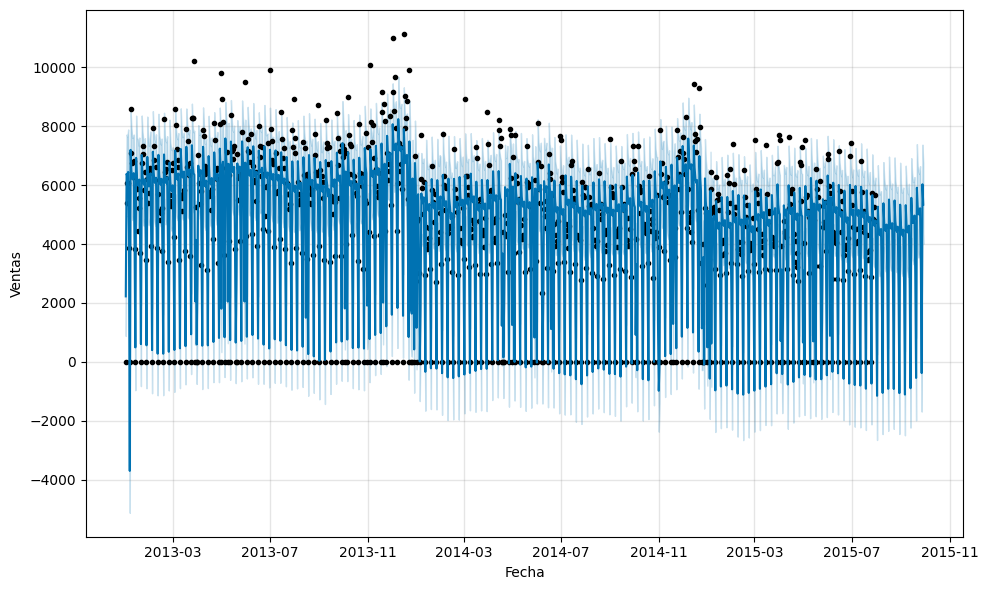

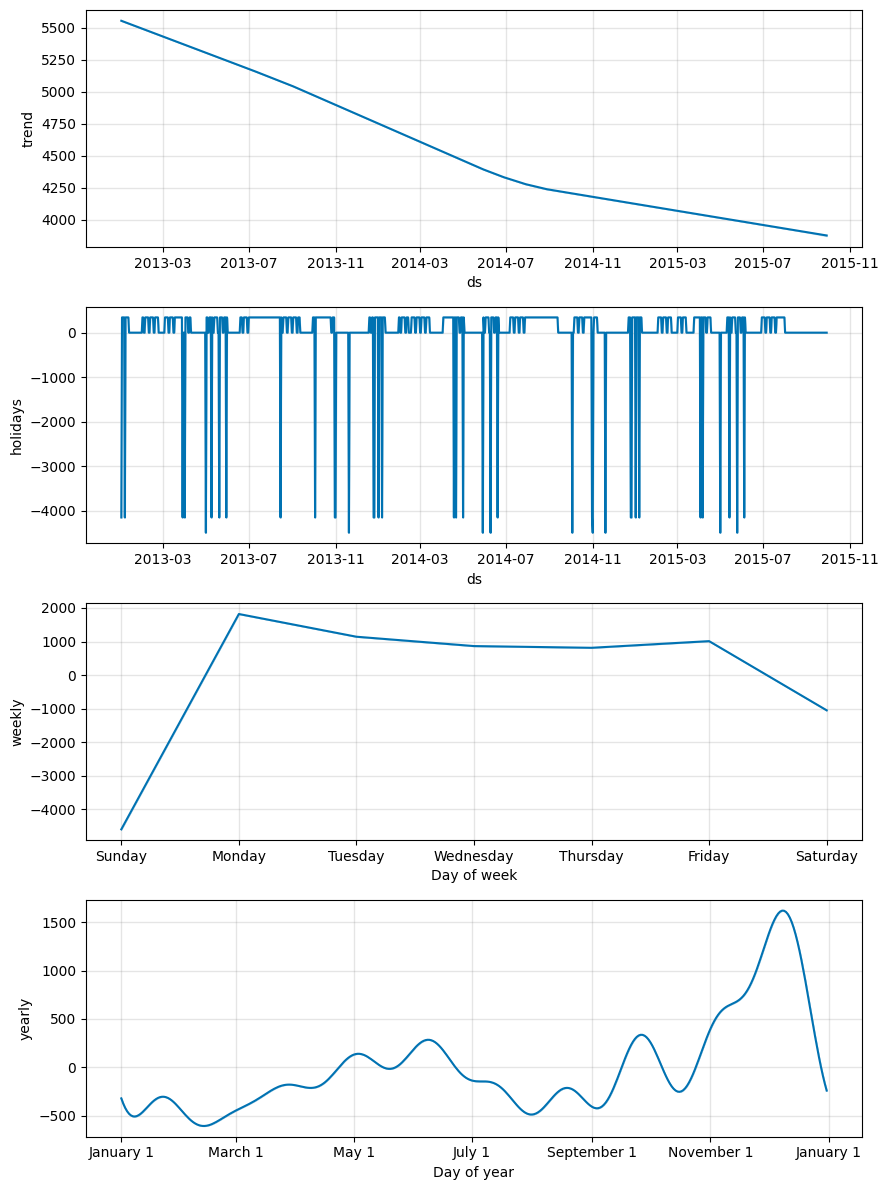

In [36]:
# Hagamos predicciones usando días festivos para una tienda específica
sales_predictions(6, sales_train_all_df, school_state_holidays, 60)

In [37]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,4343.442516,3445,6434,4343.442516,4343.442516,597.211858,597.211858,597.211858,1101.051423,1101.051423,1101.051423,-503.839565,-503.839565,-503.839565,0.0,0.0,0.0,4940
1,2013-01-02,4344.069444,3011,5935,4344.069444,4344.069444,75.719841,75.719841,75.719841,589.087102,589.087102,589.087102,-513.367261,-513.367261,-513.367261,0.0,0.0,0.0,4419
2,2013-01-03,4344.696372,2755,5790,4344.696372,4344.696372,-122.611851,-122.611851,-122.611851,392.355562,392.355562,392.355562,-514.967413,-514.967413,-514.967413,0.0,0.0,0.0,4222
3,2013-01-04,4345.323300,2981,6137,4345.323300,4345.323300,212.917135,212.917135,212.917135,721.996372,721.996372,721.996372,-509.079237,-509.079237,-509.079237,0.0,0.0,0.0,4558
4,2013-01-05,4345.950228,2512,5536,4345.950228,4345.950228,-299.169406,-299.169406,-299.169406,197.097742,197.097742,197.097742,-496.267148,-496.267148,-496.267148,0.0,0.0,0.0,4046


#Explicacion de las columnas

Aquí están las columnas del dataframe de pronóstico:

* **ds:** La fecha de la predicción.
* **trend:** La tendencia general del pronóstico.
* **yhat_lower:** El límite inferior del intervalo de incertidumbre para el pronóstico.
* **yhat_upper:** El límite superior del intervalo de incertidumbre para el pronóstico.
* **trend_lower:** El límite inferior del intervalo de incertidumbre para la tendencia.
* **trend_upper:** El límite superior del intervalo de incertidumbre para la tendencia.
* **additive_terms:** Los términos aditivos en el pronóstico.
* **additive_terms_lower:** El límite inferior del intervalo de incertidumbre para los términos aditivos.
* **additive_terms_upper:** El límite superior del intervalo de incertidumbre para los términos aditivos.
* **weekly:** El componente estacional semanal del pronóstico.
* **weekly_lower:** El límite inferior del intervalo de incertidumbre para el componente estacional semanal.
* **weekly_upper:** El límite superior del intervalo de incertidumbre para el componente estacional semanal.
* **yearly:** El componente estacional anual del pronóstico.
* **yearly_lower:** El límite inferior del intervalo de incertidumbre para el componente estacional anual.
* **yearly_upper:** El límite superior del intervalo de incertidumbre para el componente estacional anual.
* **multiplicative_terms:** Los términos multiplicativos en el pronóstico.
* **multiplicative_terms_lower:** El límite inferior del intervalo de incertidumbre para los términos multiplicativos.
* **multiplicative_terms_upper:** El límite superior del intervalo de incertidumbre para los términos multiplicativos.
* **yhat:** La predicción puntual para la fecha.

Estas columnas proporcionan un desglose detallado del pronóstico, incluida la tendencia general, los componentes estacionales y los intervalos de incertidumbre. Esta información se puede utilizar para entender el pronóstico y tomar decisiones informadas sobre la planificación futura.

Por ejemplo, la columna **trend** muestra la dirección general del pronóstico. Si la tendencia es positiva, significa que el pronóstico se espera que aumente con el tiempo. Si la tendencia es negativa, significa que el pronóstico se espera que disminuya con el tiempo.

Las columnas **yhat_lower** y **yhat_upper** muestran los límites inferior y superior del intervalo de incertidumbre para el pronóstico. Esta información se puede utilizar para evaluar la incertidumbre del pronóstico. Si el intervalo de incertidumbre es amplio, significa que el pronóstico es menos cierto. Si el intervalo de incertidumbre es estrecho, significa que el pronóstico es más cierto.

Las otras columnas en el dataframe de pronóstico proporcionan más información detallada sobre los componentes estacionales del pronóstico. Estas columnas se pueden utilizar para entender cómo el pronóstico se ve afectado por diferentes temporadas o días festivos.

Los términos aditivos en el pronóstico son cambios en el valor de la serie de tiempo que no están relacionados con la estacionalidad. Pueden ser causados por factores como cambios en la demanda, cambios en los precios o cambios en la competencia. Los términos multiplicativos en el pronóstico son cambios en el valor de la serie de tiempo que están relacionados con la estacionalidad. Pueden ser causados por factores como cambios en el clima, cambios en los días festivos o cambios en los hábitos de compra.

Por ejemplo, si estás pronosticando las ventas de helados, los términos aditivos podrían incluir cambios en el precio del helado, cambios en la competencia de otros fabricantes de helados o cambios en la demanda general de helados. Los términos multiplicativos podrían incluir cambios en el clima, cambios en los días festivos o cambios en los hábitos de compra de los consumidores.

Los términos aditivos y multiplicativos se pueden utilizar para crear un pronóstico más preciso al tener en cuenta todos los factores que pueden afectar al valor de la serie de tiempo.

In [ ]:
forecast.to_csv('forecast.csv', index=False) # Pasar el DataFrame a CSV para utilizarlo con otros medios